# <font color='Blue'>Sistema de Classificação de Risco para Concessão de Empréstimos</font>

## 1° Problema de negócios

Precisamos construir um sistema de classificação de risco do cliente para aprovação de empréstimos.

##### **Fonte dos Dados**

Usaremos a base de dados "**risco.csv**" originada por meio dos dados da **UCI Machine Learning**.

**Link**: https://archive.ics.uci.edu/ml/index.php

###### **Arquitetura dos Dados** (AD)

* **id_cliente**  : Número de identificação única do cliente
* **inad**        : Índice de inadimplência do cliente
* **Saldo_contas**: Índice referente aos saldos das contas corrente, poupança e aplicações do cliente
* **Class_Renda** : Índice referente à classificação do cliente de acordo com sua renda.
* **Anotações**   : Índice referente às anotações externas à empresa, tais como anotações SERASA / SPC / BACEN 
* **Risco**       : Risco do Cliente atribuído dadas as variáveis de análise do cliente

## 2° Análise Exploratória dos Dados

In [1]:
# Importando Bibliotecas Essenciais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [2]:
# Carregando os dados
dataset = pd.read_csv('risco.csv')

In [3]:
# Verificando os primeiros registros
dataset.head(5)

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto


In [4]:
# Informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       150 non-null    int64  
 1   anot_cadastrais  150 non-null    float64
 2   indice_inad      150 non-null    float64
 3   class_renda      150 non-null    float64
 4   saldo_contas     150 non-null    float64
 5   Risco            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Estatísticas descritivas das variáveis numéricas
dataset.describe()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Tabela de frequência da variável Risco
dataset['Risco'].value_counts()

Risco_Alto     50
Risco_Medio    50
Risco_Baixo    50
Name: Risco, dtype: int64

In [7]:
dataset

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Risco_Baixo
146,146,6.3,2.5,5.0,1.9,Risco_Baixo
147,147,6.5,3.0,5.2,2.0,Risco_Baixo
148,148,6.2,3.4,5.4,2.3,Risco_Baixo


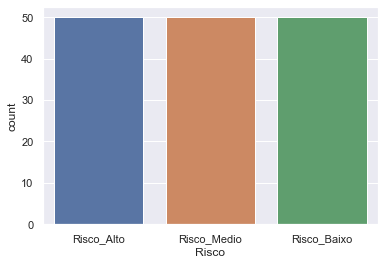

In [8]:
# Cria um gráfico de barras da variável Target
sns.countplot(x="Risco", data=dataset)
plt.show()

In [9]:
# Eliminar a coluna de identificação, pois ela não é variável explicativa, é somente a identificação do cliente
dataset = dataset.drop(columns='id_cliente')

In [10]:
# Printando o dataset
dataset

,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,5.1,3.5,1.4,0.2,Risco_Alto
1,4.9,3.0,1.4,0.2,Risco_Alto
2,4.7,3.2,1.3,0.2,Risco_Alto
3,4.6,3.1,1.5,0.2,Risco_Alto
4,5.0,3.6,1.4,0.2,Risco_Alto
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Risco_Baixo
146,6.3,2.5,5.0,1.9,Risco_Baixo
147,6.5,3.0,5.2,2.0,Risco_Baixo
148,6.2,3.4,5.4,2.3,Risco_Baixo


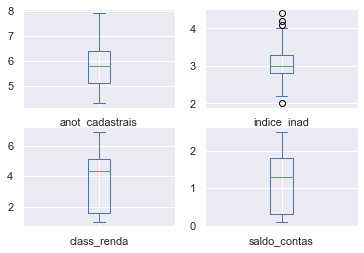

In [11]:
# Criando um gráfico boxplot
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

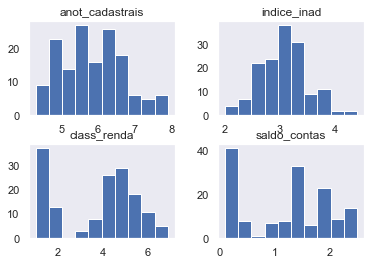

In [12]:
# Criando um histohrama
dataset.hist(grid=False)
plt.show()

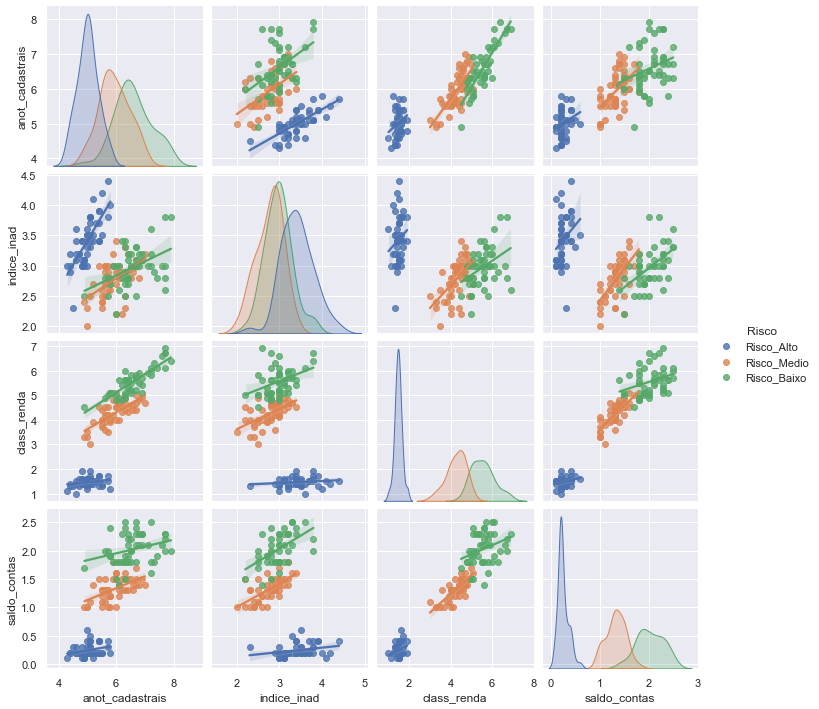

In [13]:
# Criação do gráfico de dispersão
sns.pairplot(dataset, hue='Risco', kind="reg")
plt.show()

# kind=reg é a reta de regressão
# hue='Risco' é para dividir em cores os grupos de risco

## 3° Pré-Processamento dos Dados

In [14]:
#3 Separando as Variáveis de Entrada e Saída do Modelo
X = dataset.iloc[:,:-1].values  #variáveis independentes
y = dataset.iloc[:,-1].values  #Target/labe/class/vairável dependente

### Separando os dados entre Treino e Teste

In [15]:
# Dividindo o dataset em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2)

In [16]:
# Amostra dos grupos de treino e teste

print("Dados de Treino :\n----------------\n")
print("X = \n", X_train[:2])
print("y = \n", y_train[:2])

print("\n\nDados de Teste :\n----------------\n")
print("X = \n",X_test[:2])
print("y = \n", y_test[:2])

Dados de Treino :
----------------

X = 
 [[5.9 3.2 4.8 1.8]
 [7.1 3.  5.9 2.1]]
y = 
 ['Risco_Medio' 'Risco_Baixo']


Dados de Teste :
----------------

X = 
 [[4.6 3.4 1.4 0.3]
 [5.5 2.3 4.  1.3]]
y = 
 ['Risco_Alto' 'Risco_Medio']


In [17]:
# Verificando o formato dos grupos

print(f"Shape dos dados de treino é {X_train.shape}")
print(f"Shape dos dados de teste é {X_test.shape}")

Shape dos dados de treino é (120, 4)
Shape dos dados de teste é (30, 4)


### Padronizando as Features - As variáveis explicativas (variáveis de entrada)


In [18]:
# Redimensionando os dados - feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

print("\n--------------------------------\nDataset depois da padronização:\n--------------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])


--------------------------------
Dataset depois da padronização:
--------------------------------


X_train :
 [[ 0.04855237  0.27230964  0.56990541  0.76023309]
 [ 1.50512336 -0.19450689  1.18051835  1.14624707]
 [-0.92249496  1.67275924 -1.03989234 -1.04116549]
 [-0.55835221 -0.19450689  0.40337461  0.37421911]
 [-0.92249496  0.73912618 -1.26193341 -1.29850814]]
-------------------------

X_test :
 [[-1.52939954  0.73912618 -1.31744368 -1.16983682]
 [-0.4369713  -1.82836475  0.12582327  0.11687646]
 [-0.31559038 -0.66132342  0.62541568  1.01757575]
 [ 0.16993328 -2.06177302  0.12582327 -0.26913753]
 [ 0.65545695  0.27230964  0.84745675  1.40358973]]


## 4° Construindo a Máquina Preditiva

### 1° Versão da Máquina Preditiva: Criando um **baseline**

Aqui nós vamos criar a primeira versão da Máquina Preditiva. Depois, vamos buscar formas de melhorar a assertividade do modelo. 

In [19]:
# Importando a Biblioteca KNN

from sklearn.neighbors import KNeighborsClassifier
Maquina_Preditiva = KNeighborsClassifier(n_neighbors=30) #[1,10,30,50]

In [20]:
#Treinando a Máquina preditiva com os dados de treino

Maquina_Preditiva = Maquina_Preditiva.fit(X_train,y_train)

In [21]:
#Fazendo novas Previsões com os dados de teste
y_pred = Maquina_Preditiva.predict(X_test)


print("\n---------------------------\n")
print("Valores Reais com dados de teste :\n",y_test)

print("\n---------------------------\n")
print("Valores Preditos com a Máquina Preditiva com dados de Teste :\n",y_pred)


---------------------------

Valores Reais com dados de teste :
 ['Risco_Alto' 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Medio' 'Risco_Medio'
 'Risco_Medio' 'Risco_Alto' 'Risco_Alto' 'Risco_Alto' 'Risco_Alto']

---------------------------

Valores Preditos com a Máquina Preditiva com dados de Teste :
 ['Risco_Alto' 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Medio' 'Risco_Medio'
 'Risco_Medio' 'Risco_Alto' 'Risco_Alto' 'Risco_Alto' 'Risco_Alto']


In [22]:
#Função que mostra os hyperparâmetros utilizados na construção da Máquina Preditiva 
Maquina_Preditiva.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(n_neighbors=30)>

## 5° Avaliando a Máquina Preditiva

In [23]:
# Calculando a Acurácia

from sklearn import metrics
print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred).round(2))

Acurácia da Máquina =  0.97


In [24]:
# Comparando Real e Predito com dados de Teste
print("\nReal vs Predito \n------------------------------\n")
error_df = pd.DataFrame({"Real" : y_test,
                         "Predito" : y_pred})

error_df.head(5)


Real vs Predito 
------------------------------



,Real,Predito
0,Risco_Alto,Risco_Alto
1,Risco_Medio,Risco_Medio
2,Risco_Baixo,Risco_Baixo
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Baixo


In [25]:
#Usando a confusion matrix  e o classification report para avaliar a acurácia e demais indicadores

cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

[[ 9  0  0]
 [ 0  7  0]
 [ 0  1 13]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         9
 Risco_Baixo       0.88      1.00      0.93         7
 Risco_Medio       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



## 2° Versão da Máquina Preditiva: Máquina Definitiva

In [26]:
# Importando a Biblioteca do SVM
from sklearn.svm import SVC

classifier = SVC(kernel='linear',             # ['linear', 'rbf']
                 gamma= 1e-5  ,               # [1e-1, 1e-2, 1e-3, 1e-5]
                 C=10,                        # [10.0, 100.0, 1000.0, 10000.0]
                 random_state=7)

In [27]:
#Treinando a Máquina com o SVC
classifier.fit(X_train,y_train)

SVC(C=10, gamma=1e-05, kernel='linear', random_state=7)

In [28]:
#Fazendo novas previsões com os dados de teste
y_pred = classifier.predict(X_test)

In [29]:
#Imprimindo os hyperparâmetros utilizados na criação da Maquina Preditiva Definitiva
classifier

SVC(C=10, gamma=1e-05, kernel='linear', random_state=7)

In [30]:
# Calculando a Acurácia da Máquina Preditiva

print("Acurácia = ", accuracy_score(y_test, y_pred).round(2))

# Comparando valores Reais com Preditos pela Máquina
print("\nActual vs Predicted  \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred})

error_df.head()

Acurácia =  0.97

Actual vs Predicted  
------------------------------



,Actual,Predicted
0,Risco_Alto,Risco_Alto
1,Risco_Medio,Risco_Medio
2,Risco_Baixo,Risco_Baixo
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Baixo


In [31]:
#Usando a confusion matrix e o classification report para avaliar a Máquina

cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)

In [32]:
# Imprimindo a Confusion Matrix e o Classification Report

print(cm)
print(cr)

[[ 9  0  0]
 [ 0  7  0]
 [ 0  1 13]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         9
 Risco_Baixo       0.88      1.00      0.93         7
 Risco_Medio       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30

